# Part II - (Prosper Loan Data)
## by (Rabiat Ohunene IBRAHIM)

## Investigation Overview

> The goal of this presentation is to visualize how some factors affects our chosen variables of interest which are the `BorrowerAPR` and `LoanStatus` in the prosper loan data set.

>The key insight observed from the analysis of the data set is that the prosper score of a borrower have a strong impact on his annual percentage rate.

> The loan status was also observed to show variation with the prosper score.

> We also observe that the credit score and prosper score reinforces each other in reducing the annual percentage rate on a loan.


## Dataset Overview
> This project explore the Prosper loan data set. The data set contains 113,937 observations and 81 variables which includes, loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The data types of the features present are bool(3), float64(50), int64(11), object(17). 

In [78]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [79]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

#Wrangling data set
loan_df=df.copy()
reduced_loan_df=loan_df[['TotalInquiries', 'AvailableBankcardCredit', 'LoanStatus','BorrowerAPR', 'ProsperScore',
                         'LoanOriginationDate','LoanOriginalAmount', 'Occupation', 'EmploymentStatus',
                        'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalCreditLinespast7years', 
                         'DelinquenciesLast7Years', 'DebtToIncomeRatio', 'MonthlyLoanPayment', 'IsBorrowerHomeowner', 
                         'Term', 'BorrowerRate', 'ListingCategory (numeric)', 'CurrentCreditLines',
                         'TotalInquiries', 'TotalProsperLoans', 'OnTimeProsperPayments',
                         'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
                         'ScorexChangeAtTimeOfListing', 'LoanOriginalAmount', 'LoanMonthsSinceOrigination',
                         'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper'  ]]
# Make a copy of the original data set
reduced_loan_clean=reduced_loan_df.copy()

In [80]:
#Wrangling continues 

#Convert ProsperScore to cathegorical data type
reduced_loan_clean['ProsperScore'] = reduced_loan_clean.ProsperScore.astype('category')

#Replace 'Not employed' with $0
reduced_loan_clean['IncomeRange']=reduced_loan_clean['IncomeRange'].replace(to_replace='Not employed', value= '$0')

#Convert the income range into categorical datatype
ordered_var = CategoricalDtype(categories=['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999', 
                                           '$100,000+'], ordered=True)
reduced_loan_clean['IncomeRange'] = reduced_loan_clean['IncomeRange'].astype(ordered_var)

#Creating the Average Credit score
reduced_loan_clean['AverageCreditScore']=(reduced_loan_clean['CreditScoreRangeLower']+
reduced_loan_clean['CreditScoreRangeUpper'])/2

## (Visualization 1: Prosper score versus BorrowerAPR)
> Here  we first visualize the variation of the prosper score with the Borrower's APR. We observed that as the prosper score is increasing, there is a monotonic decrease in the borrowerAPR. Which implies that the customers classified as the best customers get the least borrowerAPR and those classified as the worst customer i.e prosper score of 1 are given the highest borrowerAPR. Hence they pay more interest on thier loan. 

In [81]:
def boxchartplot(data, catvar, numvar):
    '''This function takes dataset and make a boxplot of two cathegorical variables
    from the dataset'''
    colors=sb.color_palette()[0]
    plt.figure(figsize=(10,5))
    sb.boxplot(data=data, x=catvar, y=numvar, color=colors);

In [82]:
#Regrouping the past dues and creating loanstatussummary 
reduced_loan_clean['LoanStatusSummary']=reduced_loan_clean['LoanStatus'].replace(['Past Due (1-15 days)', 
                                                                                  'Past Due (31-60 days)', 
                                                                                  'Past Due (61-90 days)', 
                                                                                  'Past Due (91-120 days)', 
                                                                                  'Past Due (16-30 days)', 
                                                                                 'Past Due (>120 days)',
                                                                                 'Defaulted','Chargedoff',
                                                                                 'Cancelled'],
                                                                                 'deliquent, default and charged off')


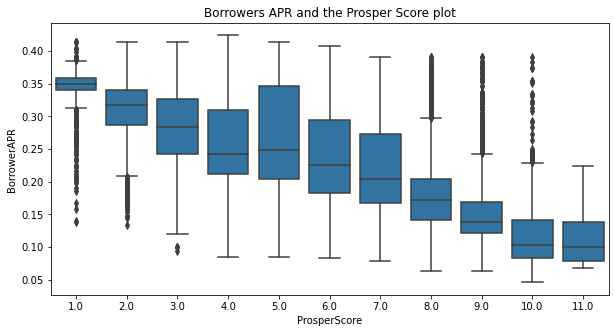

In [83]:
#Plot of BorrowerAPR versus Prosperscore
boxchartplot(reduced_loan_clean, 'ProsperScore', 'BorrowerAPR')
plt.title('Borrowers APR and the Prosper Score plot');

## (Visualization 2: Variation of the prosper score with the loan status)

>Here we observe that customers classified as good customers, for example prosper score  7 and above have least amount of defaulter where as customers with prosper score less than  6 recorded more number of defaulters. 

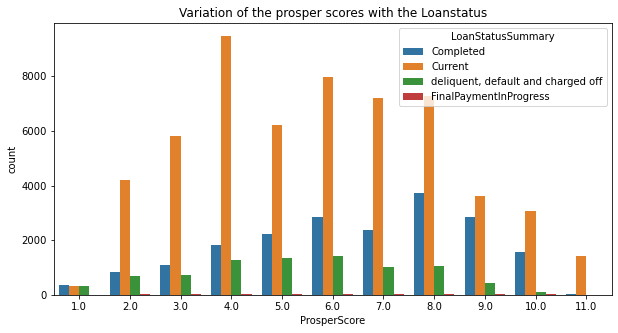

In [84]:
plt.figure(figsize=(10,5))
sb.countplot(data = reduced_loan_clean, x = 'ProsperScore', hue = 'LoanStatusSummary');
plt.title('Variation of the prosper scores with the Loanstatus');

## (Visualization 3: Visualizing the BorrowerAPR versus prosper score and credit score)

> The next plot shows the variation of the prosper score and the credit score with the BorrowerAPR. 

> We can observe from the plot that, having a high credit score may not necessarily guarantee a borrower low APR, having a high prosper score can help lower the APR. However, it is better to have both, a high credit score and prosper score. This can drastically reduce a borrower's APR.

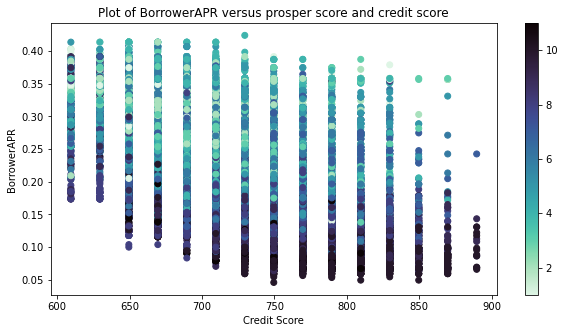

In [85]:
#Visualizing the BorrowerAPR versus prosper score and credit score plot
plt.figure(figsize = [10, 5])
plt.scatter(data = reduced_loan_clean, x = 'AverageCreditScore', y = 'BorrowerAPR', c = 'ProsperScore',
            cmap = 'mako_r');
plt.colorbar()
plt.xlabel('Credit Score')
plt.ylabel('BorrowerAPR')
plt.title('Plot of BorrowerAPR versus prosper score and credit score');

In [86]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 698407 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted
